In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

In [12]:
cwd = Path.cwd()
print(cwd)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results


In [13]:
filepath = os.path.join(cwd, "Results", "10_000ops_single", "load_measurements_10_000_prepared.csv")
print(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\10_000ops_single\load_measurements_10_000_prepared.csv


In [14]:
df = pd.read_csv(filepath)
print(df.head)

<bound method NDFrame.head of       workerId queryType                               queryId           sent  \
0          w1a    INSERT  0b036aa3-75a5-4b36-8f78-6cecccece1a3  1657710893174   
1          w1b    INSERT  0b036aa3-75a5-4b36-8f78-6cecccece1a3  1657710893173   
2          w1a    INSERT  4e5b7111-e538-4e66-9da6-4bcc1faf8242  1657710893368   
3          w1a    INSERT  ba985415-0511-4543-abc5-c5430e4d6d40  1657710893470   
4          w1b    INSERT  4e5b7111-e538-4e66-9da6-4bcc1faf8242  1657710893396   
...        ...       ...                                   ...            ...   
19995      w1b    INSERT  1e73df30-2cdf-44c0-a8df-b502bad989c7  1657711394775   
19996      w1b    INSERT  b1eebdf5-97c0-4e49-aa04-00eb3177a032  1657711394808   
19997      w1b    INSERT  a2a68a4f-054a-4c9c-93d9-84e775bf630c  1657711394840   
19998      w1b    INSERT  7b9d2be1-a635-4e77-8b7d-9c546dfdd8d3  1657711394873   
19999      w1b    INSERT  3f249c24-0701-4f56-a5f1-5d9449b5b2c8  1657711394927  

In [15]:
print(df["sent"].max())

1657711394927


In [17]:
df["latency_ms"] = df["received"]- df["sent"]


In [18]:
print(df.head())


  workerId queryType                               queryId           sent  \
0      w1a    INSERT  0b036aa3-75a5-4b36-8f78-6cecccece1a3  1657710893174   
1      w1b    INSERT  0b036aa3-75a5-4b36-8f78-6cecccece1a3  1657710893173   
2      w1a    INSERT  4e5b7111-e538-4e66-9da6-4bcc1faf8242  1657710893368   
3      w1a    INSERT  ba985415-0511-4543-abc5-c5430e4d6d40  1657710893470   
4      w1b    INSERT  4e5b7111-e538-4e66-9da6-4bcc1faf8242  1657710893396   

        received target-region  latency_ms  
0  1657710893367  europe-west1         193  
1  1657710893396  europe-west1         223  
2  1657710893470  europe-west1         102  
3  1657710893535  europe-west1          65  
4  1657710893543  europe-west1         147  


In [22]:
df["latency_ms"].describe()

count    20000.000000
mean        49.838750
std         25.877738
min         26.000000
25%         30.000000
50%         35.000000
75%         63.000000
max        253.000000
Name: latency_ms, dtype: float64

In [23]:
sns.set_theme(style="darkgrid")


In [24]:
totalTime = df["received"].max() - df["sent"].min()
print(totalTime/1000/60, "minuten")

8.363083333333334 minuten


In [25]:
print(df["sent"].min())

1657710893173


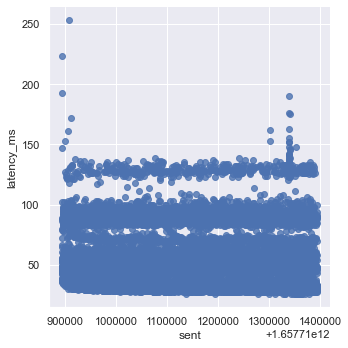

In [26]:
sns.lmplot(x='sent', y='latency_ms', data=df, fit_reg=False)

In [27]:
dfA = df.loc[(df["workerId"] == "w1a") | (df["workerId"] == "w2a") | (df["workerId"] == "w3a")]
dfB = df.loc[(df["workerId"] == "w1b") | (df["workerId"] == "w2b") | (df["workerId"] == "w3b")]

In [28]:
dfA.head()


,workerId,queryType,queryId,sent,received,target-region,latency_ms
0,w1a,INSERT,0b036aa3-75a5-4b36-8f78-6cecccece1a3,1657710893174,1657710893367,europe-west1,193
2,w1a,INSERT,4e5b7111-e538-4e66-9da6-4bcc1faf8242,1657710893368,1657710893470,europe-west1,102
3,w1a,INSERT,ba985415-0511-4543-abc5-c5430e4d6d40,1657710893470,1657710893535,europe-west1,65
5,w1a,INSERT,59351431-241d-44ef-b7ad-c875821c9cad,1657710893535,1657710893578,europe-west1,43
8,w1a,INSERT,3aa8aef0-03db-4f64-a4f0-1be6e65c93f1,1657710893578,1657710893632,europe-west1,54


In [29]:
dfA.describe()

,sent,received,latency_ms
count,1.000000e+04,1.000000e+04,10000.000000
mean,1.657711e+12,1.657711e+12,49.520500
std,1.419447e+05,1.419441e+05,25.616335
min,1.657711e+12,1.657711e+12,26.000000
25%,1.657711e+12,1.657711e+12,30.000000
50%,1.657711e+12,1.657711e+12,35.000000
75%,1.657711e+12,1.657711e+12,62.000000
max,1.657711e+12,1.657711e+12,253.000000


In [30]:
dfB.head()

,workerId,queryType,queryId,sent,received,target-region,latency_ms
1,w1b,INSERT,0b036aa3-75a5-4b36-8f78-6cecccece1a3,1657710893173,1657710893396,europe-west1,223
4,w1b,INSERT,4e5b7111-e538-4e66-9da6-4bcc1faf8242,1657710893396,1657710893543,europe-west1,147
6,w1b,INSERT,ba985415-0511-4543-abc5-c5430e4d6d40,1657710893543,1657710893581,europe-west1,38
7,w1b,INSERT,59351431-241d-44ef-b7ad-c875821c9cad,1657710893581,1657710893623,europe-west1,42
10,w1b,INSERT,3aa8aef0-03db-4f64-a4f0-1be6e65c93f1,1657710893623,1657710893695,europe-west1,72


In [31]:
dfB.describe()

,sent,received,latency_ms
count,1.000000e+04,1.000000e+04,10000.000000
mean,1.657711e+12,1.657711e+12,50.157000
std,1.443086e+05,1.443081e+05,26.133933
min,1.657711e+12,1.657711e+12,26.000000
25%,1.657711e+12,1.657711e+12,30.750000
50%,1.657711e+12,1.657711e+12,35.000000
75%,1.657711e+12,1.657711e+12,64.000000
max,1.657711e+12,1.657711e+12,223.000000


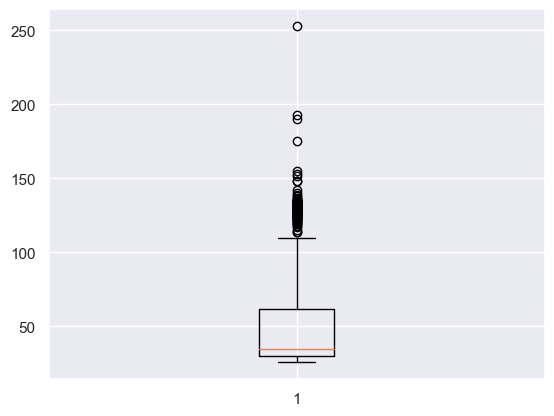

In [33]:
ax = plt.boxplot(x=dfA["latency_ms"],)
